* 학습목표
1. 판다스의 merge, concat, combine_first함수를 이용해 Series나 DF 객체를 병함 또는 연결할 수 있다.
2. 판다스의 stack/unstack, pivot, set_index 함수를 이용하여 Series나 DF객체를 재형성 할 수 있다.

# 과제
    * titanic.csv파일에서 누락값을 처리 후 DF객체인 titanic을 생성한다.
    * titanic에서 승객 등급별 생존자를 확인하기 편하도록 재형성 한다.
    
# 과제2
    * 7.5장의 예제: 미국 농무부 음식 데이터 베이스를 따라서 수행해보고 7장의 내용을 복습 및 예습한다.

In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame, Series

In [2]:
titanic=pd.read_csv('titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [16]:
titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [3]:
#퍼센트
titanic['Survived'].value_counts(normalize=True) * 100

0    61.616162
1    38.383838
Name: Survived, dtype: float64

In [4]:
pd.crosstab(titanic.Pclass, [titanic.Sex, titanic.Survived])# , normalize = "columns" )

Sex      female     male    
Survived      0   1    0   1
Pclass                      
1             3  91   77  45
2             6  70   91  17
3            72  72  300  47

### 누락값 처리

In [5]:
titanic.Embarked.value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [ ]:
#titanic.Embarked.dropna().unique()

In [6]:
titanic.shape

(891, 12)

In [7]:
clean_titanic = titanic.dropna( axis = 1, how = "any" ) #any로 하면 하나라도 없으면  사라짐
clean_titanic.shape

(891, 9)

In [8]:
titanic=titanic.dropna(how='all')
titanic=titanic.dropna(how='all', axis=1)
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
clean_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500


In [10]:
clean_titanic[(clean_titanic.Survived == 1 )][['Pclass', 'Name', 'Sex']].head()

,Pclass,Name,Sex
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female
2,3,"Heikkinen, Miss. Laina",female
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female
8,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female
9,2,"Nasser, Mrs. Nicholas (Adele Achem)",female


In [11]:
clean_titanic[(clean_titanic.Pclass.isnull())][['Pclass', 'Name', 'Sex']].head()

,Pclass,Name,Sex


In [12]:
clean_titanic["gender"] = clean_titanic.Sex.map( lambda x: int( x == 'male' ))
clean_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,gender
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,1


In [13]:
clean_titanic.groupby( 'Pclass' )['Survived'].value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [14]:
#c_data1=clean_titanic.groupby( ['Pclass', 'Survived'] )['Sex'].value_counts()
c_data1=clean_titanic.groupby( ['Pclass', 'Survived'] )['gender'].sum().reset_index()
c_data1

,Pclass,Survived,gender
0,1,0,77
1,1,1,45
2,2,0,91
3,2,1,17
4,3,0,300
5,3,1,47


In [15]:
t_data=titanic.groupby( ['Pclass', 'Survived'] )['Age'].mean().reset_index()
t_data

,Pclass,Survived,Age
0,1,0,43.695312
1,1,1,35.368197
2,2,0,33.544444
3,2,1,25.901566
4,3,0,26.555556
5,3,1,20.646118


In [17]:
titanic_f=pd.merge(c_data1, t_data, on=['Pclass', 'Survived'], sort=True)

In [139]:
titanic_f[titanic_f.index%2==1]['Sex']='female'
titanic_f[titanic_f.index%2==1]['Sex']='male'

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [18]:
titanic_f

,Pclass,Survived,gender,Age
0,1,0,77,43.695312
1,1,1,45,35.368197
2,2,0,91,33.544444
3,2,1,17,25.901566
4,3,0,300,26.555556
5,3,1,47,20.646118


In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

In [72]:
c_data2=pd.crosstab(titanic.Pclass, titanic.Survived)# , normalize = "columns" 

## 승객 등급별 생존자확인

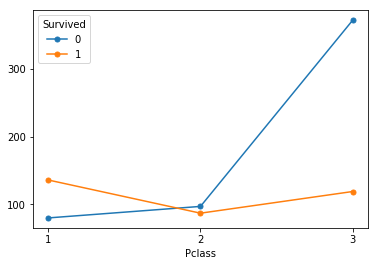

In [76]:
c_data2.plot(xticks=[1,2,3], yticks=[100, 200, 300], marker='.', markersize=10)

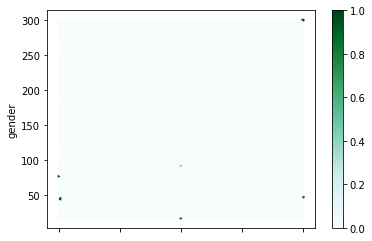

In [53]:
c_data1.plot(x='Pclass', y='gender', kind='hexbin')

## 7장 예제 실행하기

In [80]:
import json
db = json.load(open('../pydata-book-1st-edition/ch07/foods-2011-10-03.json'))
len(db)

6636

In [81]:
db[0].keys()

dict_keys(['id', 'description', 'tags', 'manufacturer', 'group', 'portions', 'nutrients'])

In [84]:
db[0]['nutrients'][:1]

[{'description': 'Protein',
  'group': 'Composition',
  'units': 'g',
  'value': 25.18}]

In [85]:
nutrients = DataFrame(db[0]['nutrients'])
nutrients[:7]

,description,group,units,value
0,Protein,Composition,g,25.18
1,Total lipid (fat),Composition,g,29.20
2,"Carbohydrate, by difference",Composition,g,3.06
3,Ash,Other,g,3.28
4,Energy,Energy,kcal,376.00
5,Water,Composition,g,39.28
6,Energy,Energy,kJ,1573.00


In [87]:
info_keys = ['description', 'group', 'id', 'manufacturer']
info = DataFrame(db, columns=info_keys)
info.head()

,description,group,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,


In [89]:
pd.value_counts(info.group).head(10)

Vegetables and Vegetable Products    812
Beef Products                        618
Baked Products                       496
Breakfast Cereals                    403
Fast Foods                           365
Legumes and Legume Products          365
Lamb, Veal, and Game Products        345
Sweets                               341
Pork Products                        328
Fruits and Fruit Juices              328
Name: group, dtype: int64

In [90]:
nutrients = []

for rec in db:
    fnuts = DataFrame(rec['nutrients'])
    fnuts['id'] = rec['id']
    nutrients.append(fnuts)

nutrients = pd.concat(nutrients, ignore_index=True)

In [91]:
nutrients.duplicated().sum()
nutrients = nutrients.drop_duplicates()

In [93]:
col_mapping = {'description' : 'food',
               'group'       : 'fgroup'}
info = info.rename(columns=col_mapping, copy=False)
info.head()

,food,fgroup,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,


In [94]:
col_mapping = {'description' : 'nutrient',
               'group' : 'nutgroup'}
nutrients = nutrients.rename(columns=col_mapping, copy=False)
nutrients.head()

,nutrient,nutgroup,units,value,id
0,Protein,Composition,g,25.18,1008
1,Total lipid (fat),Composition,g,29.20,1008
2,"Carbohydrate, by difference",Composition,g,3.06,1008
3,Ash,Other,g,3.28,1008
4,Energy,Energy,kcal,376.00,1008


In [95]:
ndata = pd.merge(nutrients, info, on='id', how='outer')
ndata.head()

,nutrient,nutgroup,units,value,id,food,fgroup,manufacturer
0,Protein,Composition,g,25.18,1008,"Cheese, caraway",Dairy and Egg Products,
1,Total lipid (fat),Composition,g,29.20,1008,"Cheese, caraway",Dairy and Egg Products,
2,"Carbohydrate, by difference",Composition,g,3.06,1008,"Cheese, caraway",Dairy and Egg Products,
3,Ash,Other,g,3.28,1008,"Cheese, caraway",Dairy and Egg Products,
4,Energy,Energy,kcal,376.00,1008,"Cheese, caraway",Dairy and Egg Products,


In [97]:
ndata.iloc[30000]

nutrient                                       Glycine
nutgroup                                   Amino Acids
units                                                g
value                                             0.04
id                                                6158
food            Soup, tomato bisque, canned, condensed
fgroup                      Soups, Sauces, and Gravies
manufacturer                                          
Name: 30000, dtype: object

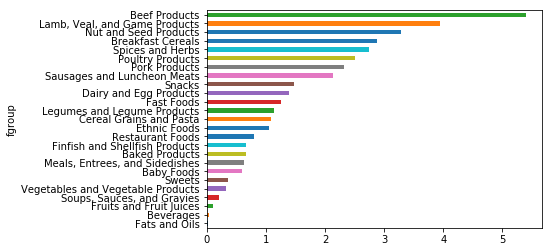

In [100]:
result = ndata.groupby(['nutrient', 'fgroup'])['value'].quantile(0.5)
result['Zinc, Zn'].sort_values().plot(kind='barh')

In [101]:
by_nutrient = ndata.groupby(['nutgroup', 'nutrient'])

get_maximum = lambda x: x.xs(x.value.idxmax())
get_minimum = lambda x: x.xs(x.value.idxmin())

max_foods = by_nutrient.apply(get_maximum)[['value', 'food']]

# make the food a little smaller
max_foods.food = max_foods.food.str[:50]

In [102]:
max_foods.loc['Amino Acids']['food']

nutrient
Alanine                           Gelatins, dry powder, unsweetened
Arginine                               Seeds, sesame flour, low-fat
Aspartic acid                                   Soy protein isolate
Cystine                Seeds, cottonseed flour, low fat (glandless)
Glutamic acid                                   Soy protein isolate
Glycine                           Gelatins, dry powder, unsweetened
Histidine                Whale, beluga, meat, dried (Alaska Native)
Hydroxyproline    KENTUCKY FRIED CHICKEN, Fried Chicken, ORIGINA...
Isoleucine        Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Leucine           Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Lysine            Seal, bearded (Oogruk), meat, dried (Alaska Na...
Methionine                    Fish, cod, Atlantic, dried and salted
Phenylalanine     Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Proline                           Gelatins, dry powder, unsweetened
Serine            Soy protein isolate, 